In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pystan
import math
import random
from sympy import *
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)
%matplotlib inline

In [114]:
#スプーンが当たるか否か
data=[0,0,0,1,1]
#事前分布(一様)
pd=1

In [115]:
#積分するシンボル
theta = symbols('θ')

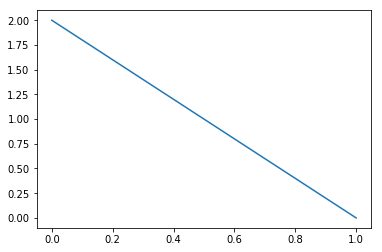

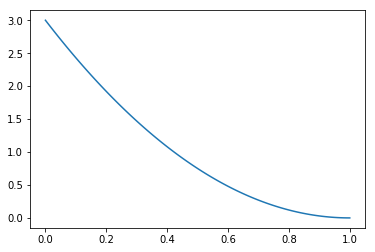

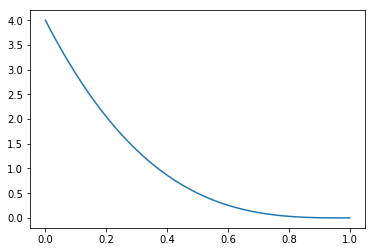

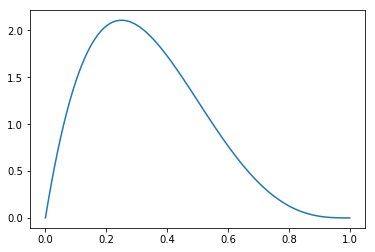

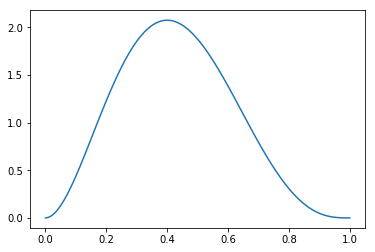

In [116]:
X=np.linspace(0,1,100)
for num,hit in enumerate(data):
    if hit==1:
        f=integrate(pd*theta,(theta,0,1))
        k=1/f
        pd=k*pd*theta
    else:
        f=integrate(pd*(1-theta),(theta,0,1))
        k=1/f
        pd=k*pd*(1-theta)
    #print(pd)
    plt.plot(X,[pd.subs(theta, i) for i in X])
    plt.show()
#plt.plot(X,[pd.subs(theta, i) for i in X],label=num)
#plt.legend()
#plt.show()

In [135]:
data=[1 for i in range(23)]
data.extend([0 for i in range(112)])
random.shuffle(data)

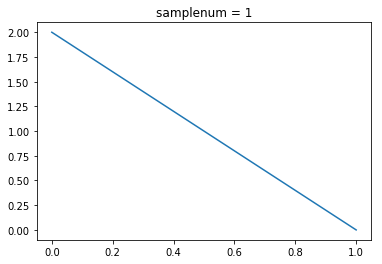

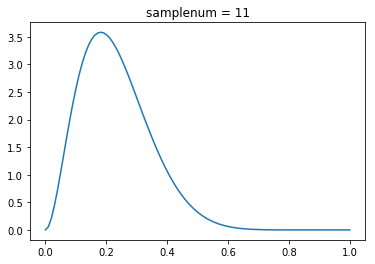

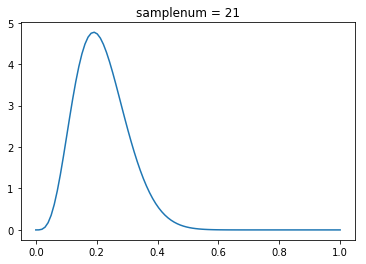

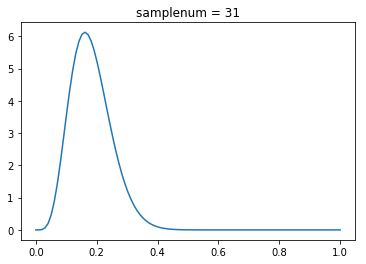

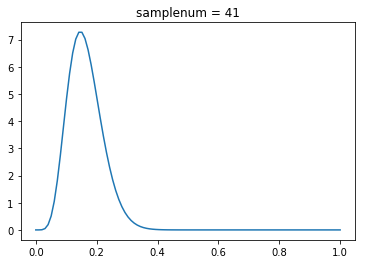

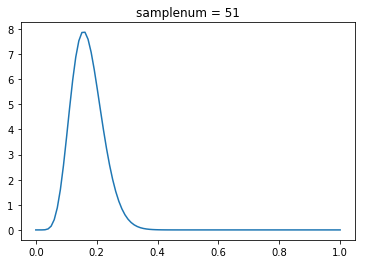

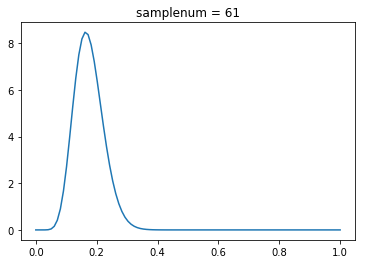

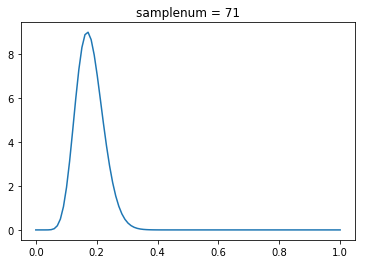

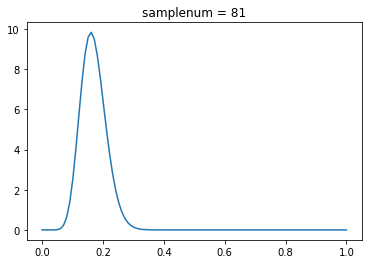

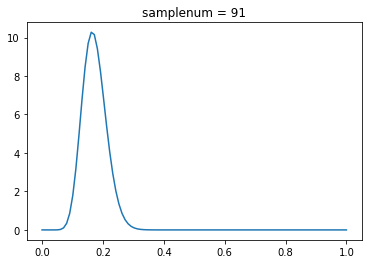

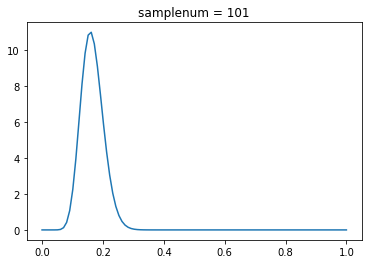

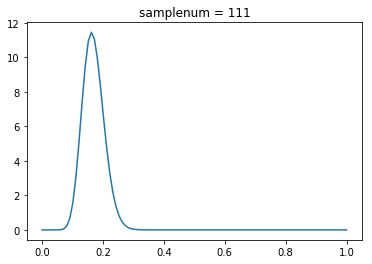

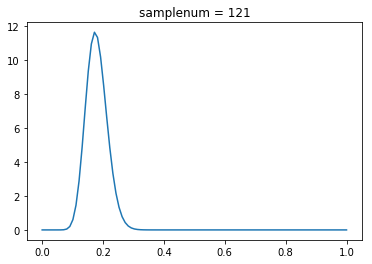

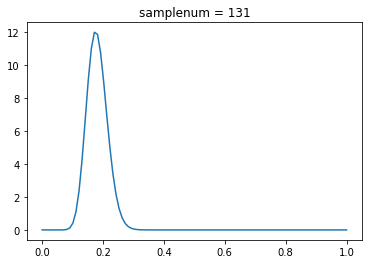

2389423714798248392615208000*θ**23*(-3*θ + 3)*(-θ + 1)**111


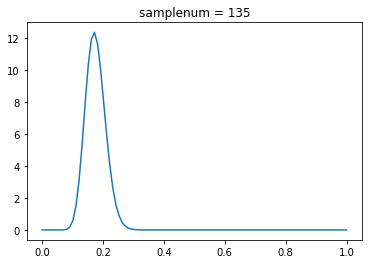

In [150]:
#事前分布
pd=1
#積分するシンボル
theta = symbols('θ')
#グラフの連番
gnum=0
X=np.linspace(0,1,100)
for num,hit in enumerate(data):
    if hit==1:
        f=integrate(pd*theta,(theta,0,1))
        k=1/f
        pd=k*pd*theta
    else:
        f=integrate(pd*(1-theta),(theta,0,1))
        k=1/f
        pd=k*pd*(1-theta)
    if num%10==0:
        plt.plot(X,[pd.subs(theta, i) for i in X])
        plt.title(f'samplenum = {num+1}')
        plt.savefig('../graph/curry_{}.png'.format(gnum))   
        plt.show()
        gnum+=1
print(pd)    
plt.plot(X,[pd.subs(theta, i) for i in X])
plt.title(f'samplenum = {num+1}')
#plt.savefig('../graph/curry_{}.png'.format(gnum))
plt.show()
#plt.legend()
#plt.show()

In [139]:
from PIL import Image, ImageFilter
#gifアニメの作成
images=[]
for num in range(15):
    im = Image.open("../graph/curry_{}.png".format(num))
    images.append(im)
images[0].save('../graph/curry.gif',
               save_all=True, append_images=images[1:], optimize=False, duration=700, loop=0)

In [140]:
#MCMC
import pystan
from pystan import StanModel

# Stanコード
model = """
data{
  int<lower=0> N;
  int<lower=0, upper=1> y[N];
}
parameters{
  real<lower=0, upper=1> theta;
}
model{
  for(n in 1:N){
    y[n] ~ bernoulli(theta); // コイン投げモデル
  }
}
"""

In [141]:
stan_data = {'N': len(data),'y': data}
sm = pystan.StanModel(model_code=model)
%time fit = sm.sampling(data=stan_data, iter=1000, chains=3)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e839527a7839429919b59bd6e7b94f83 NOW.


CPU times: user 22.5 ms, sys: 48.4 ms, total: 70.8 ms
Wall time: 275 ms


In [142]:
fit

Inference for Stan model: anon_model_e839527a7839429919b59bd6e7b94f83.
3 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=1500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.18  1.3e-3   0.03   0.12   0.15   0.17    0.2   0.24    596    1.0
lp__  -64.06    0.02   0.67 -65.98 -64.21  -63.8 -63.62 -63.57    786    1.0

Samples were drawn using NUTS at Wed Feb 13 22:28:57 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [143]:
# サンプル列を抽出
la  = fit.extract(permuted=True)

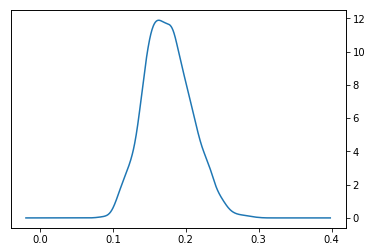

In [148]:
#plt.figure(figsize=(12,8))
#plt.violinplot(la["theta"]) #バイオリンプロット
pd.Series(la["theta"]).plot(kind="kde", secondary_y=True) #カーネル密度推定
#plt.hist(la["theta"],bins=30) #ヒストグラム
#plt.xticks(rotation=45)
#plt.tick_params(labelsize=18)
plt.show()
